In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
df.shape

(10886, 12)

In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [61]:
df['season'].replace([1,2,3,4],["spring","summer","fall","winter"],inplace=True)
df['holiday'].replace([0,1],['Yes','No'], inplace=True)
df['workingday'].replace([0,1],['Working Day','Non working day'], inplace=True)
df['weather'].replace([1,2,3,4],['Good','cloudy/mist','slightly bad','Bad'],inplace=True)

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [62]:
columns = ['season', 'holiday', 'workingday', 'weather',
        'humidity', 'casual', 'registered', 'count']
for col in columns:
    print(f"Feature {col}")
    print(df[col].value_counts()[:10])
    print("-"*50)

Feature season
winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64
--------------------------------------------------
Feature holiday
Yes    10575
No       311
Name: holiday, dtype: int64
--------------------------------------------------
Feature workingday
Non working day    7412
Working Day        3474
Name: workingday, dtype: int64
--------------------------------------------------
Feature weather
Good            7192
cloudy/mist     2834
slightly bad     859
Bad                1
Name: weather, dtype: int64
--------------------------------------------------
Feature humidity
88    368
94    324
83    316
87    289
70    259
65    253
46    247
66    246
77    244
49    234
Name: humidity, dtype: int64
--------------------------------------------------
Feature casual
0    986
1    667
2    487
3    438
4    354
5    332
6    269
8    250
7    250
9    230
Name: casual, dtype: int64
--------------------------------------------------
Feature registered

In [63]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,Yes,Working Day,Good,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,spring,Yes,Working Day,Good,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,spring,Yes,Working Day,Good,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,spring,Yes,Working Day,Good,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,spring,Yes,Working Day,Good,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,Yes,Non working day,Good,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,winter,Yes,Non working day,Good,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,winter,Yes,Non working day,Good,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,winter,Yes,Non working day,Good,13.94,17.425,61,6.0032,12,117,129


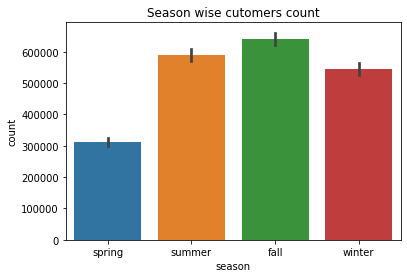

In [12]:
sns.barplot(x='season',y='count',data=df,estimator=np.sum)
plt.title('Season wise cutomers count')
plt.show()

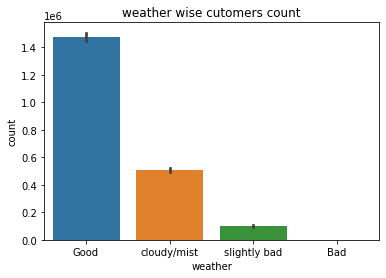

In [64]:
sns.barplot(x='weather',y='count',data=df,estimator = np.sum)
plt.title('weather wise cutomers count')
plt.show()

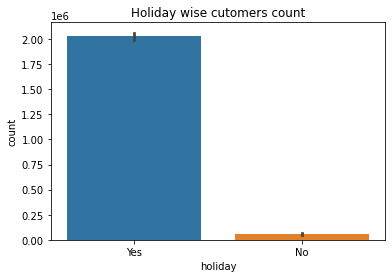

In [14]:
sns.barplot(x='holiday',y='count',data=df,estimator=np.sum)
plt.title('Holiday wise cutomers count')
plt.show()

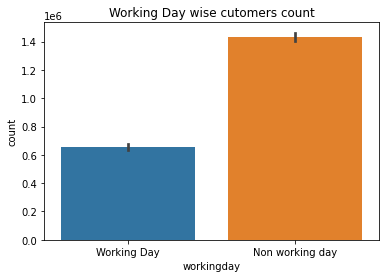

In [15]:
sns.barplot(x='workingday',y='count',data=df,estimator=np.sum)
plt.title('Working Day wise cutomers count')
plt.show()

In [16]:
print(f"Number of casual users are : {df['casual'].sum()}, where as number of registered users are : {df['registered'].sum()}.")

Number of casual users are : 392135, where as number of registered users are : 1693341.


<AxesSubplot:xlabel='count', ylabel='Density'>

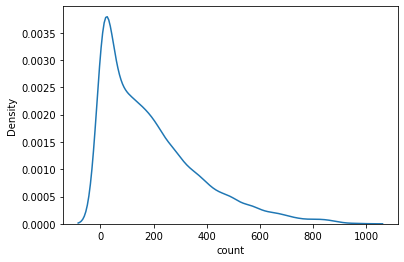

In [17]:
sns.kdeplot(df['count'])

<AxesSubplot:xlabel='temp', ylabel='Count'>

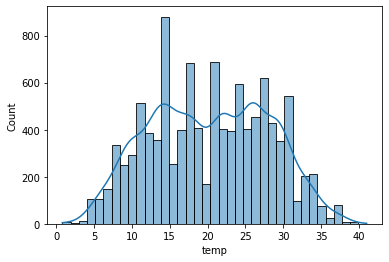

In [18]:
sns.histplot(df['temp'],kde=True)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

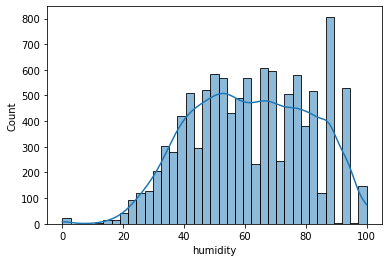

In [19]:
sns.histplot(df['humidity'],kde=True)

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

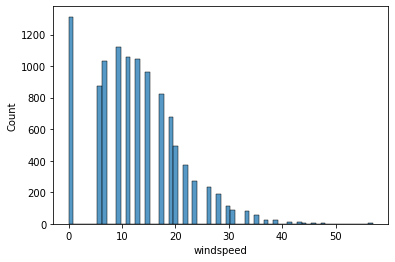

In [20]:
sns.histplot(df['windspeed'])

<AxesSubplot:xlabel='count', ylabel='Count'>

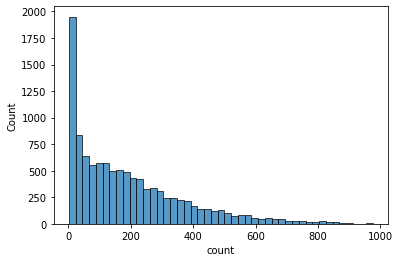

In [21]:
sns.histplot(df['count'])

<AxesSubplot:xlabel='casual', ylabel='Count'>

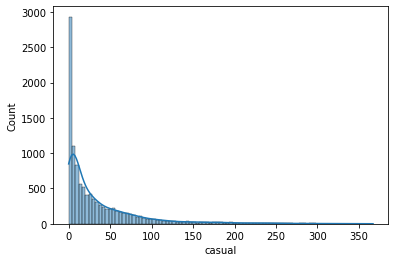

In [22]:
sns.histplot(df['casual'],kde=True)

<AxesSubplot:xlabel='registered', ylabel='Count'>

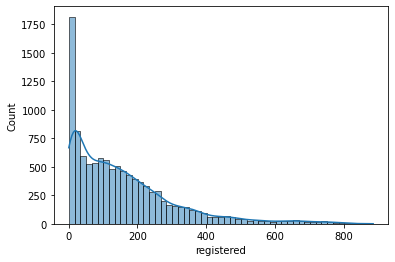

In [23]:
sns.histplot(df['registered'],kde=True)

In [24]:
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [25]:
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [26]:
df['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [95]:
# df_byyear = df.groupby(df['datetime'].dt.year)
# df_bymonth = df.groupby(df['datetime'].dt.year)
df_byday = df.groupby(df['datetime'].dt.year)

In [111]:
df_byday['count']

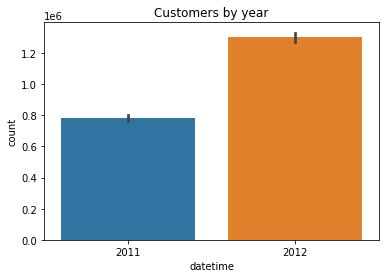

In [36]:
sns.barplot(x=df['datetime'].dt.year,y='count',data=df,estimator=np.sum)
plt.title("Customers by year")
plt.show()

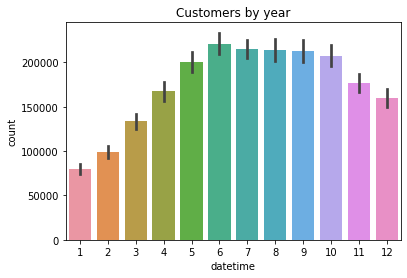

In [39]:
sns.barplot(x=df['datetime'].dt.month,y='count',data=df,estimator=np.sum)
plt.title("Customers by year")
plt.show()

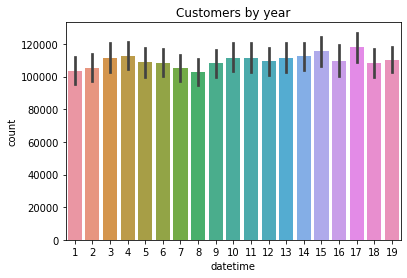

In [40]:
sns.barplot(x=df['datetime'].dt.day,y='count',data=df,estimator=np.sum)
plt.title("Customers by year")
plt.show()

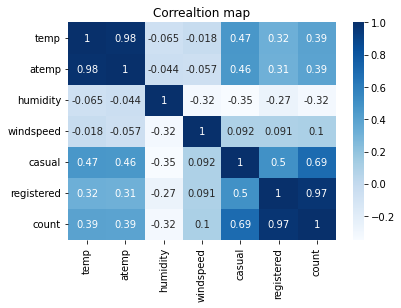

In [65]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correaltion map')
plt.show()

In [75]:
print(df[df['workingday'] == 'Working Day']['count'].std(),df[df['workingday'] == 'Non working day']['count'].std())

173.7240153250003 184.5136590421481


In [87]:
t,p = stats.ttest_ind(df[df['workingday'] == 'Working Day']['count'],df[df['workingday'] == 'Non working day']['count'])
t,p

(-1.2096277376026694, 0.22644804226361348)

In [90]:
good = df[df['weather'] == 'Good']['count']
bad = df[df['weather'] == 'Bad']['count']
slightly_bad = df[df['weather'] == 'slightly bad']['count']
cloudy = df[df['weather'] == 'cloudy/mist']['count']

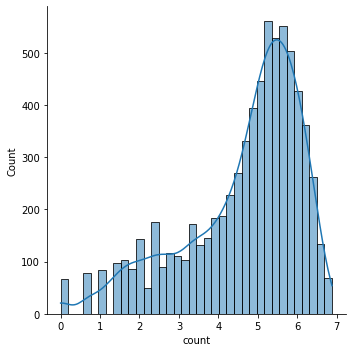

In [108]:
temp = df[df['weather'] == 'Good']['count'].apply(lambda x: np.log(x))
sns.displot(temp,kde=True)

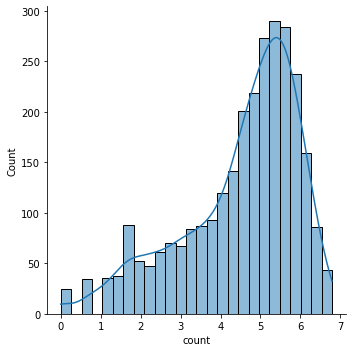

In [109]:
temp = df[df['weather'] == 'cloudy/mist']['count'].apply(lambda x: np.log(x))
sns.displot(temp,kde=True)

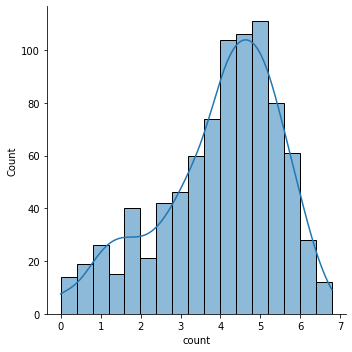

In [110]:
temp = df[df['weather'] == 'slightly bad']['count'].apply(lambda x: np.log(x))
sns.displot(temp,kde=True)

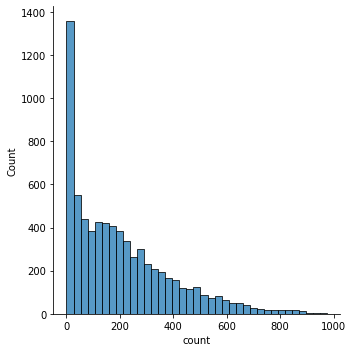

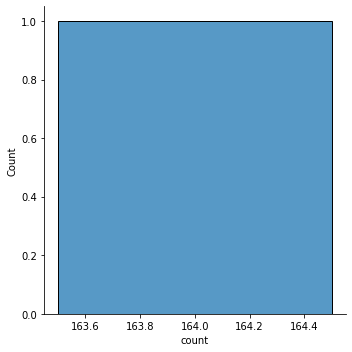

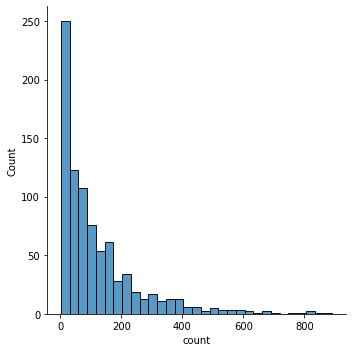

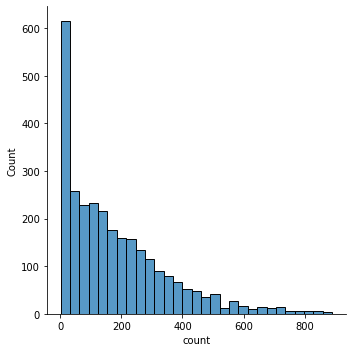

In [94]:
sns.displot(good)
plt.show()
sns.displot(bad)
plt.show()
sns.displot(slightly_bad)
plt.show()
sns.displot(cloudy)
plt.show()

In [100]:
t,p = stats.f_oneway(good,bad,slightly_bad,cloudy)
t,p

(65.53024112793271, 5.482069475935669e-42)

In [86]:
df[df['weather'] == 'Bad']['count']

5631    164
Name: count, dtype: int64